In [1]:
%matplotlib inline

import awkward as ak
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from rich import print

from python.analysis import BeamParticleSelection, LegacyBeamParticleSelection, PFOSelection
from python.analysis import Master, Plots, vector

plt.style.use('ggplot')
plt.rcParams.update({'patch.linewidth': 1})
plt.rcParams.update({'font.size': 10})

save = False

In [2]:
print(plt.rcParams['axes.prop_cycle'])

cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8'])

In [3]:
events = Master.Data("work/ROOTFiles/v4/Prod4a_1GeV_BeamSim_00_prelim.root")

mask, table = BeamParticleSelection.CreateDefaultSelection(events, verbose = True)

table.to_latex("beam_particle_selection.tex")

_, table = LegacyBeamParticleSelection.CreateLegacyBeamParticleSelection(events, True)
table.to_latex("legacy_beam_particle_selection.tex")

events.Filter([mask], [mask])


number of entries before|after PiBeamSelection: 23671|13429
number of entries before|after PandoraTagCut: 23671|19508
number of entries before|after CaloSizeCut: 23671|19197


/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in divide
  result = getattr(ufunc, method)(


number of entries before|after BeamQualityCut: 23671|14421
number of entries before|after APA3Cut: 23671|21417


/home/sb16165/anaconda3/envs/python3_10_0/lib/python3.10/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in divide
  result = getattr(ufunc, method)(


number of entries before|after MichelScoreCut: 23671|9570
number of entries before|after MedianDEdXCut: 23671|15911
                 number of events which pass the cut  single efficiency  \
no selection                                 23671.0         100.000000   
PiBeamSelection                              13429.0          56.731866   
PandoraTagCut                                19508.0          82.413079   
CaloSizeCut                                  19197.0          81.099235   
BeamQualityCut                               14421.0          60.922648   
APA3Cut                                      21417.0          90.477800   
MichelScoreCut                                9570.0          40.429217   
MedianDEdXCut                                15911.0          67.217270   

                 number of events after successive cuts  \
no selection                                    23671.0   
PiBeamSelection                                 13429.0   
PandoraTagCut                  

/tmp/ipykernel_34996/2732914206.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex("beam_particle_selection.tex")


number of entries before|after HasTruthInfo: 23671|23591
number of entries before|after Pi0InFinalState: 23671|2422
number of entries before|after BeamMCFilter: 23671|2422
number of entries before|after PiBeamSelection: 23671|10946


number of dalitz decays: 21291

number of entries before|after DiPhotonCut: 23671|2380
number of entries before|after RecoBeamParticleCut: 23671|19444
number of entries before|after HasPFO: 23671|23671
number of entries before|after HasBacktracked: 23671|23671
number of entries before|after BothPhotonsBacktracked: 23671|1235
                        number of events which pass the cut  \
no selection                                        23671.0   
BeamMCFilter                                         2422.0   
PiBeamSelection                                     10946.0   
DiPhotonCut                                          2380.0   
RecoBeamParticleCut                                 19444.0   
HasPFO                                              23671.0   
HasBacktracked                                      23671.0   
BothPhotonsBacktracked                               1235.0   

                        single efficiency  \
no selection                   100.000000   
BeamMCFilter                    10.231929   
Pi

/tmp/ipykernel_34996/2732914206.py:8: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table.to_latex("legacy_beam_particle_selection.tex")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to filters.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to _TrueParticleData__pi0_MC.
  warnings.warn(f"Couldn't apply filters to {var}.")
/home/sb16165/Documents/pi0-analysis/analysis/python/analysis/Master.py:54: UserWarning: Couldn't apply filters to filename.
  warnings.warn(f"Couldn't apply filters to {var}.")


number of entries before|after EMScoreCut: 1581154|611762
number of entries before|after NHitsCut: 1581154|216992
number of entries before|after BeamParticleDistanceCut: 1581154|28464
number of entries before|after BeamParticleIPCut: 1581154|12254
                         number of events which pass the cut  \
no selection                                       1581154.0   
EMScoreCut                                          611762.0   
NHitsCut                                            216992.0   
BeamParticleDistanceCut                              28464.0   
BeamParticleIPCut                                    12254.0   
VetoBeamParticle                                   1578128.0   

                         single efficiency  \
no selection                    100.000000   
EMScoreCut                       38.690855   
NHitsCut                         13.723647   
BeamParticleDistanceCut           1.800204   
BeamParticleIPCut                 0.775004   
VetoBeamParticle           

(array([0, 1, 2, 3]), array([2602,  347,   72,    5]))

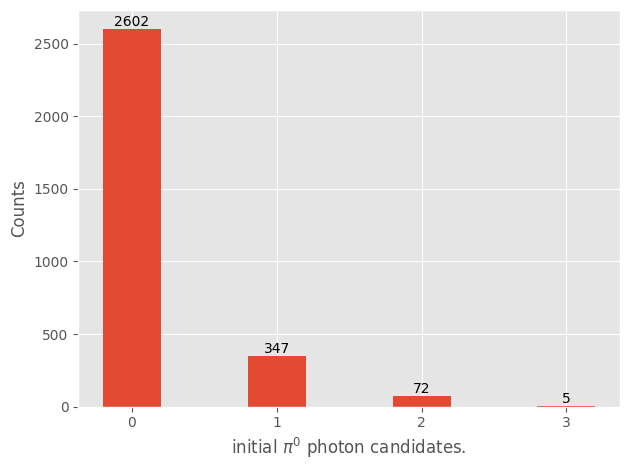

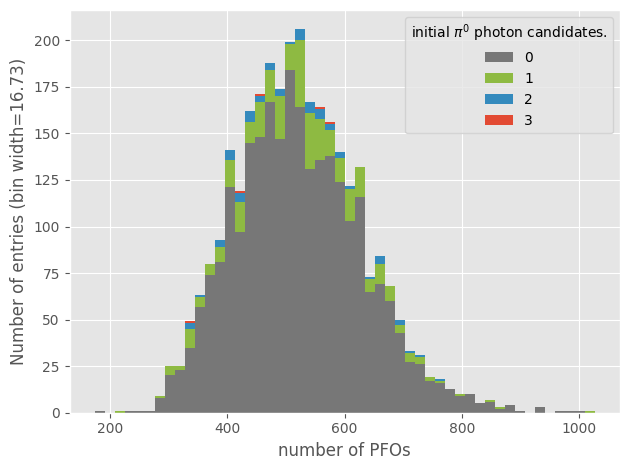

In [4]:
photon_candidate_cmap = {
    "gray" : "#777777",
    "green": "#8EBA42",
    "blue" : "#348ABD",
    "red"  : "#E24A33",
}

start_showers_mask = PFOSelection.InitialPi0PhotonSelection(events, verbose = True)

nPFO = ak.num(events.recoParticles.number)
nPhotons = ak.num(events.recoParticles.number[start_showers_mask])

Plots.PlotBar(nPhotons, xlabel = "initial $\pi^{0}$ photon candidates.", bar_labels = True)
if save: Plots.Save("initial_photon_candidates", "work/2023/preliminary/", 100)
samples = [nPFO[nPhotons == p] for p in np.unique(nPhotons)]

print(np.unique(nPhotons, return_counts = True))

Plots.PlotHist(samples, bins = 50, stacked = True, label = np.unique(nPhotons), density = False, color = list(photon_candidate_cmap.values()), xlabel = "number of PFOs")
plt.legend(title = "initial $\pi^{0}$ photon candidates.")
if save: Plots.Save("nPFO", "work/2023/preliminary/", 100)

number of entries before|after BothPhotonsBacktracked: 3026|317


Events which pass the Beam particle Selection, initial photon shower selection and has sufficient truth information
such that the full matching study can be performed: 50

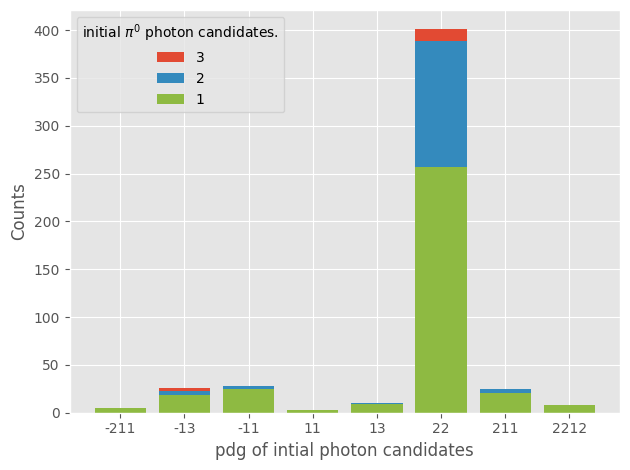

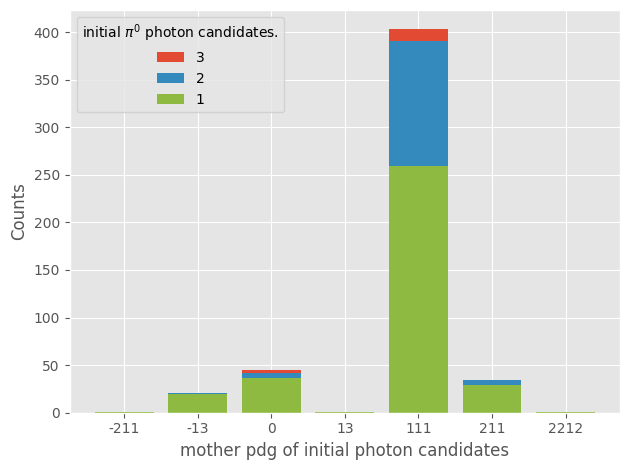

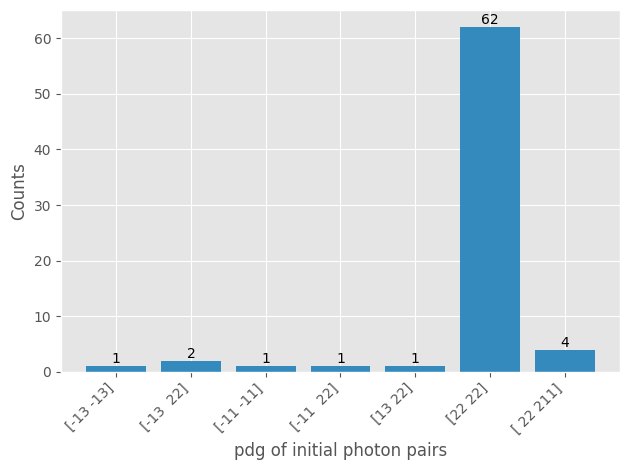

In [5]:
both_photons_backtracked_mask = LegacyBeamParticleSelection.BothPhotonsBacktracked(events)

valid_events = both_photons_backtracked_mask & (nPhotons == 2) # this tells us how many of these events we can do our merging study on
print(f"Events which pass the Beam particle Selection, initial photon shower selection and has sufficient truth information such that the full matching study can be performed: {ak.count(valid_events[valid_events])}")

pdg = events.trueParticlesBT.pdg[start_showers_mask]
mother_pdg = events.trueParticlesBT.motherPdg[start_showers_mask]


#* stacked bar plot
# get unique entries in data
# bar = np.unique(ak.ravel(pdg))
# get unique entries in data per sample + counts
pdg_split = [list(np.unique(pdg[nPhotons == i], return_counts = True)) for i in range(1, 4)] 
mother_pdg_split = [list(np.unique(mother_pdg[nPhotons == i], return_counts = True)) for i in range(1, 4)]

# StackedBar(pdg_split, labels = [1, 2, 3], xlabel = "pdg of intial photon candidates", colours = list(photon_candidate_cmap.values())[1:], label_title = "initial $\pi^{0}$ photon candidates.")
Plots.PlotStackedBar(pdg_split, labels = [1, 2, 3], xlabel = "pdg of intial photon candidates", colours = list(photon_candidate_cmap.values())[1:], label_title = "initial $\pi^{0}$ photon candidates.")
if save: Plots.Save("pdg", "work/2023/preliminary/", 100)

Plots.PlotStackedBar(mother_pdg_split, [1, 2, 3], "mother pdg of initial photon candidates", colours = list(photon_candidate_cmap.values())[1:], label_title = "initial $\pi^{0}$ photon candidates.")
if save: Plots.Save("mother_pdg", "work/2023/preliminary/", 100)

unique_pairs = np.unique(ak.sort(pdg[nPhotons == 2], 1), axis = 0, return_counts = True)
x = [np.array2string(i) for i in unique_pairs[0]]
plt.figure()
bar = plt.bar(x, unique_pairs[1], color = photon_candidate_cmap["blue"])
plt.bar_label(bar, unique_pairs[1])
plt.xticks(rotation = 45, ha = "right")
plt.xlabel("pdg of initial photon pairs")
plt.ylabel("Counts")
plt.tight_layout()
if save: Plots.Save("pdg_pairs", "work/2023/preliminary/", 100)

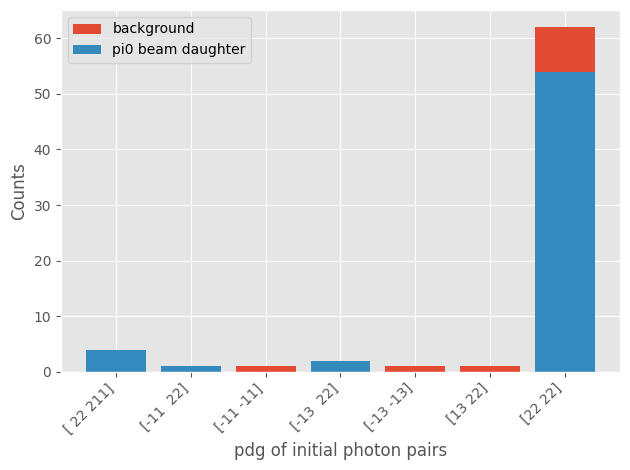

In [6]:
pi0_candidates = nPhotons == 2

is_pi0 = mother_pdg[pi0_candidates] == 111 # mask which selects photon candidates that originate from a pi0

pi0s = events.trueParticlesBT.GetUniqueParticleNumbers(events.trueParticlesBT.mother[start_showers_mask][pi0_candidates][is_pi0])
max_pi0s = ak.max(ak.num(pi0s))
pi0s = ak.fill_none(ak.pad_none(pi0s, max_pi0s, -1), -999, -1)

beam_daughter = ak.concatenate([events.trueParticles.mother[pi0_candidates][events.trueParticles.number[pi0_candidates] == pi0s[:, p]] == 1 for p in range(max_pi0s)], -1)
beam_daughter = ak.fill_none(ak.pad_none(beam_daughter, 1, -1), False)
beam_daughter = ak.any(beam_daughter, -1) # this basically says I don't care if the two true photons come from different pi0s.

pair_candidates = [
    list(np.unique(ak.sort(pdg[pi0_candidates][beam_daughter], 1), axis = 0, return_counts = True)),
    list(np.unique(ak.sort(pdg[pi0_candidates][~beam_daughter], 1), axis = 0, return_counts = True))
]

x = [
    [np.array2string(i) for i in pair_candidates[0][0]],
    [np.array2string(i) for i in pair_candidates[1][0]]
]

pair_candidates[0][0] = x[0]
pair_candidates[1][0] = x[1]

Plots.PlotStackedBar(pair_candidates, ["pi0 beam daughter", "background"], "pdg of initial photon pairs")
plt.xticks(rotation = 45, ha = "right")
plt.tight_layout()
if save: Plots.Save("tagged_pdg_pairs", "work/2023/preliminary/", 100)

In [24]:
from python.analysis import EventSelection

tags = {}
tags["$\geq 1\pi^{0} + X$"] = EventSelection.generate_truth_tags(events, (1,), 0) # n pi0 + X (inclusive signal)
tags["$1\pi^{0} + 0\pi^{+}$"] = EventSelection.generate_truth_tags(events, 1, 0)     # 1 pi0 + 0 pi+ (exclusive charge exchange signal)
tags["$0\pi^{0} + 0\pi^{+}$"] = EventSelection.generate_truth_tags(events, 0, (0,))   # 0 pi0 + X (background)
tags["$1\pi^{0} + \geq 1\pi^{+}$"] = EventSelection.generate_truth_tags(events, 1, (1,))   # 1 pi0 + >= 1 pi+ (sideband)
tags["$0\pi^{0} + \geq 1\pi^{+}$"] = EventSelection.generate_truth_tags(events, 0, (1,))   # 0 pi0 + >= 1 pi+ (sideband)

tags_cmap = {
"$\geq 1\pi^{0} + X$" : "#348ABD",
"$1\pi^{0} + 0\pi^{+}$" : "#8EBA42",
"$0\pi^{0} + 0\pi^{+}$" : "#777777",
"$1\pi^{0} + \geq 1\pi^{+}$" : "#E24A33",
"$0\pi^{0} + \geq 1\pi^{+}$" : "#988ED5",
}

tags_simple = {
"$\geq 1\pi^{0} + X$" : "inclusive signal",
"$1\pi^{0} + 0\pi^{+}$" : "exclusive signal",
"$0\pi^{0} + 0\pi^{+}$" : "background",
"$1\pi^{0} + \geq 1\pi^{+}$" : "sideband",
"$0\pi^{0} + \geq 1\pi^{+}$" : "sideband",
}

tag='$\\geq 1\\pi^{0} + X$'

tag='$1\\pi^{0} + 0\\pi^{+}$'

tag='$0\\pi^{0} + 0\\pi^{+}$'

tag='$1\\pi^{0} + \\geq 1\\pi^{+}$'

tag='$0\\pi^{0} + \\geq 1\\pi^{+}$'

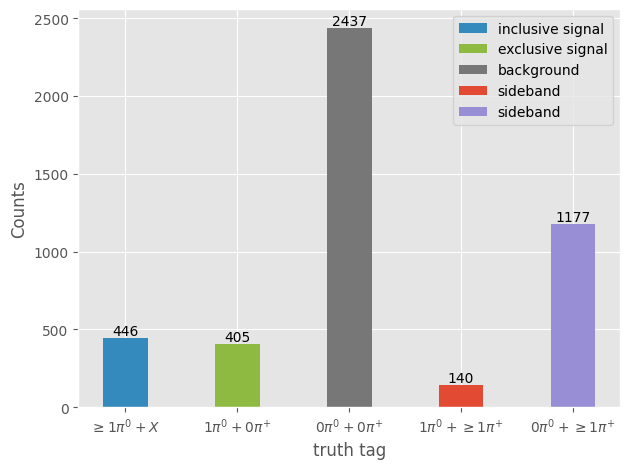

In [40]:
for tag, mask in tags.items():
    print(f"{tag=}")
    t, c = BeamParticleSelection.CountMask(mask)
    Plots.PlotBar([tag]*c, xlabel = "truth tag", color = tags_cmap[tag], label = tags_simple[tag], newFigure = False)

# colors = [tags_cmap[i] for i in sorted(list(tags_cmap.keys()))]

# Plots.PlotBar(counts, color = colors)
# plt.legend(colors)
# plt.xticks(rotation = 45, ha = "right")

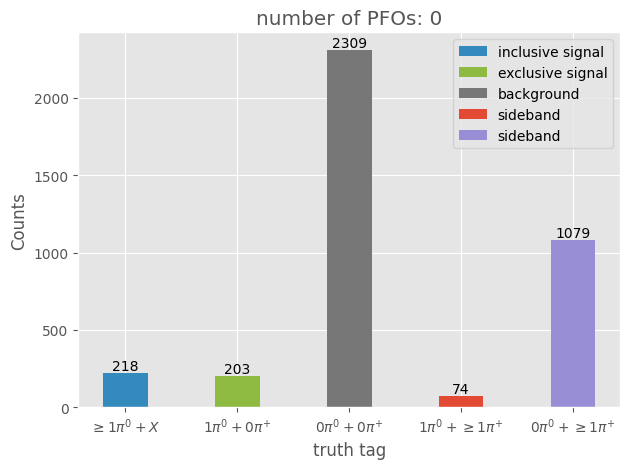

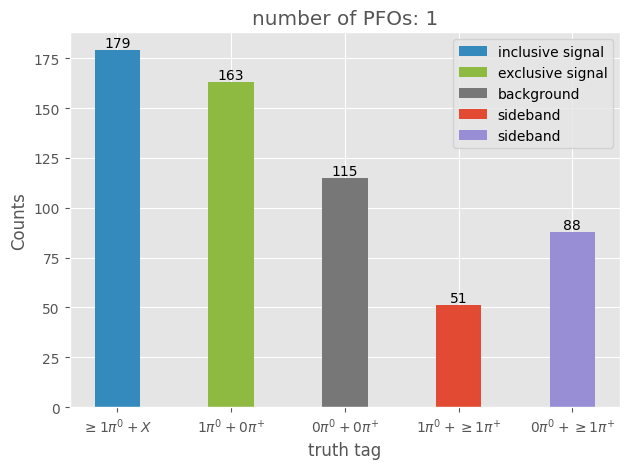

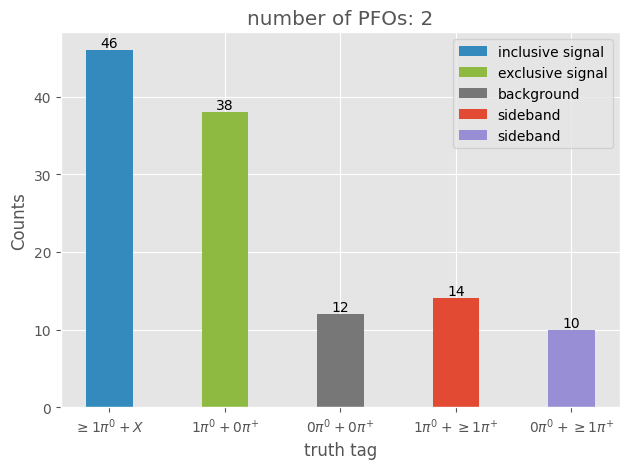

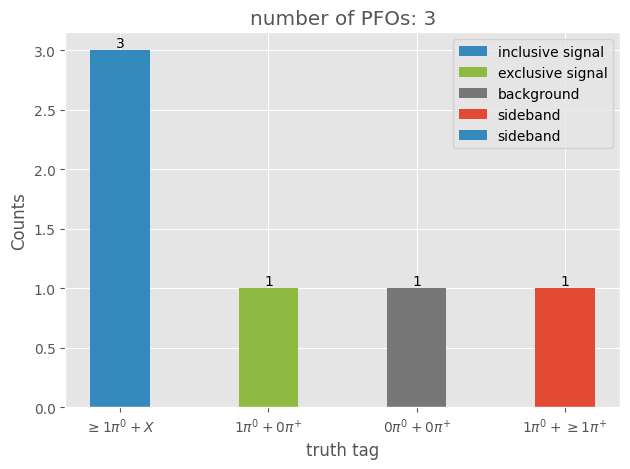

In [41]:
for s in np.unique(nPhotons):
    plt.figure()
    for tag, mask in tags.items():
        _, c = BeamParticleSelection.CountMask(mask[nPhotons == s])
        Plots.PlotBar([tag]*c, xlabel = "truth tag", color = tags_cmap[tag], label = tags_simple[tag], title = f"number of PFOs: {s}", newFigure = False)

In [51]:
import pandas as pd
columns = ["total MC", "selected MC", "total data", "selected data"]
table = {
    "Beam PDG Cut"      : [298194, 170238, 1215251, 119545],
    "Pandora Track Cut" : [170238, 142362, 119545, 100150],
    "Beam Quality Cut"  : [142362, 100824, 100150, 70441],
    "APA3 EndZ Cut"     : [100824, 82212, 70441, 54128],
    "Michel score Cut"  : [82212, 80616, 54128, 52872],
    "Chi2/DOF Cut"      : [80616, 76583, 52872, 49712],
    "Beam Scraper Cut"  : [76583, 60174, 49712, 34783]
}

table = pd.DataFrame(table).T
table.columns = columns
print(table)

100 * table["selected MC"] / table["total MC"][0]


total MC  selected MC  total data  selected data
Beam PDG Cut         298194       170238     1215251         119545
Pandora Track Cut    170238       142362      119545         100150
Beam Quality Cut     142362       100824      100150          70441
APA3 EndZ Cut        100824        82212       70441          54128
Michel score Cut      82212        80616       54128          52872
Chi2/DOF Cut          80616        76583       52872          49712
Beam Scraper Cut      76583        60174       49712          34783

Beam PDG Cut         57.089680
Pandora Track Cut    47.741403
Beam Quality Cut     33.811546
APA3 EndZ Cut        27.569971
Michel score Cut     27.034749
Chi2/DOF Cut         25.682274
Beam Scraper Cut     20.179480
Name: selected MC, dtype: float64